## MINI PROJECT 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,r2_score
from sklearn.metrics import classification_report as cr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("House Grade.csv")
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


### DATA PREPROCESSING

In [4]:
df.shape

(3000, 14)

In [5]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [6]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [7]:
df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [9]:
df.drop('Id',axis=1,inplace=True)

### VISUALISATION

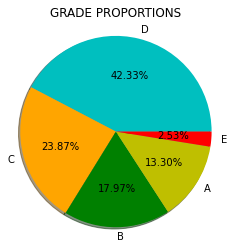

In [10]:
plt.pie(df['Grade'].value_counts(),labels=df['Grade'].value_counts().keys(),autopct='%0.2f%%',colors=('c','orange','g','y','r'),shadow=True,radius=1.1);
plt.title("GRADE PROPORTIONS");

#### INTERPRETATION: GRADE D IS HAVING HIGHEST DISTRIBUTION AMONG ALL GRADES.

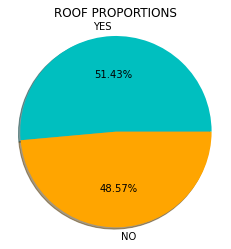

In [11]:
plt.pie(df['roof'].value_counts(),labels=df['roof'].value_counts().keys(),autopct='%0.2f%%',colors=('c','orange'),shadow=True,radius=1.1);
plt.title("ROOF PROPORTIONS");

#### INTERPRETATION:51% OF FLATS ARE HAVING ROOFS.

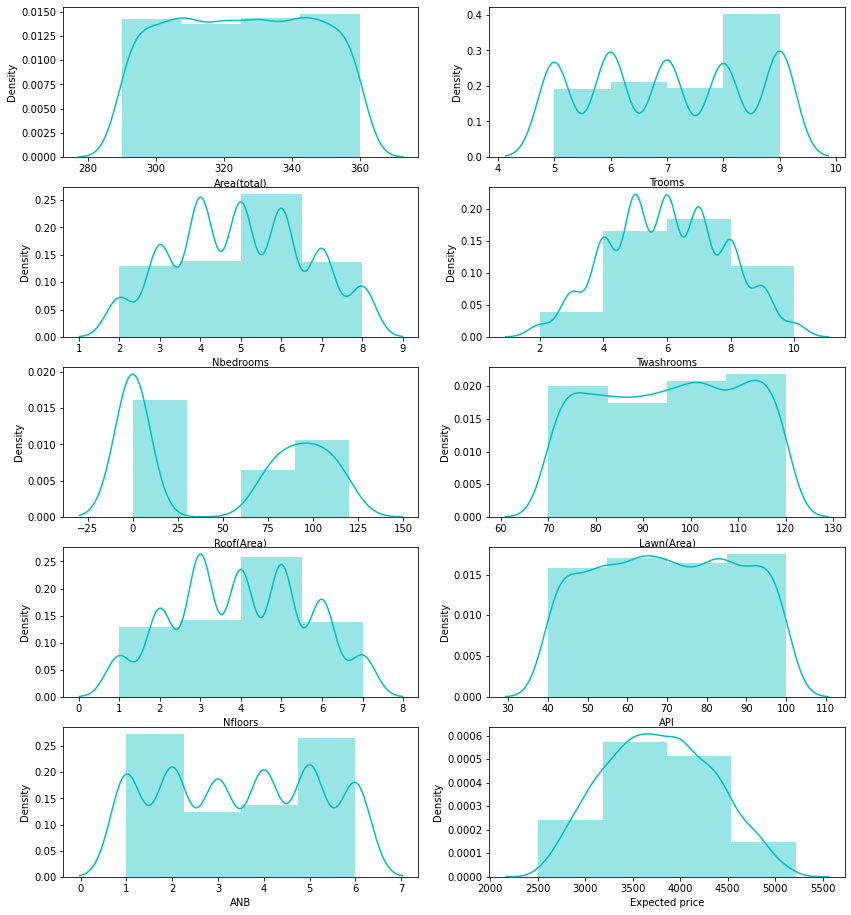

In [13]:
columns=['Area(total)', 'Trooms', 'Nbedrooms', 'Twashrooms', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price']
fig,ax=plt.subplots(5,2,figsize=(14,16))
for i,j in zip(columns,ax.flatten()):
    sns.distplot(df[i],ax=j,color='c',bins=4)

#### INTERPRETATION: DISTRIBUTION OF EACH COLUMNS.

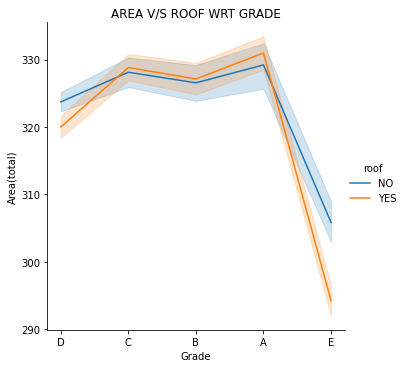

In [12]:
sns.relplot(data=df,kind='line',x='Grade',y='Area(total)',hue='roof');
plt.title("AREA V/S ROOF WRT GRADE");

#### INTERPRETATION: GRADE A FALTS HAVE HIGHEST TOTAL AREA & E HAS THE LOWEST WITH AND WITHOUT ROOF.

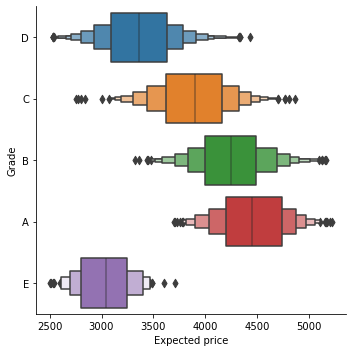

In [13]:
sns.catplot(data=df,kind='boxen',x='Expected price',y='Grade');

#### INTERPRETATION: DISTRIBUTION OF PRICE W.R.T GRADES.FOR GRADE A FLATS,PRICE RANGE IS HIGH AND FOR E IT IS LOWEST.

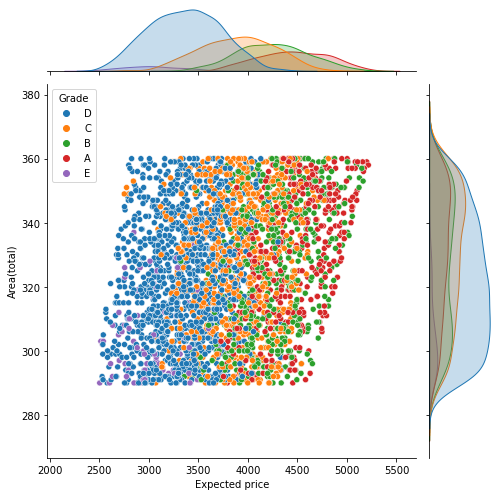

In [14]:
sns.jointplot(data=df, x="Expected price", y="Area(total)", hue="Grade",height=7);

#### INTERPRETATION: FOR GRADE D, PRICE AND AREA DISTRIBUTION IS VERY HIGH & FOR GRADE E IT IS LOWEST.

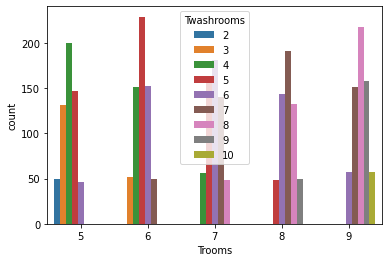

In [15]:
sns.countplot(data=df,hue='Twashrooms',x='Trooms');

#### INTERPRETATION:BATHROOMS AND ROOMS ARE DEPENDING DIRECTLY ON EACH OTHER.

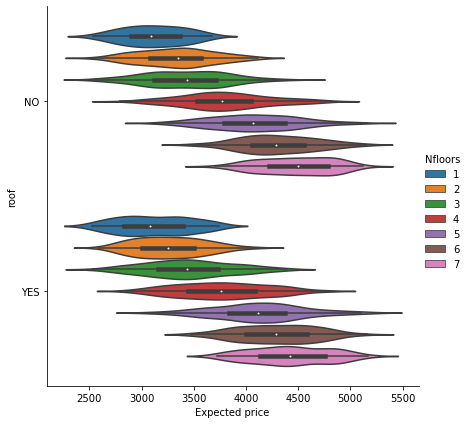

In [16]:
sns.catplot(data=df, kind="violin", x="Expected price", y="roof", hue="Nfloors",height=6);

#### INTERPRETATION: EXPECTED PRICE IS INCREASING AS NUMBER OF FLOORS ARE INCREASING.ALSO WITH ROOF OR WITHOUT ROOF PRICE DISTRBUTION IS NOT DIFFERING MUCH.  

In [17]:
le=preprocessing.LabelEncoder()
df['roof']=le.fit_transform(df['roof'])
df['Grade']=le.fit_transform(df['Grade'])

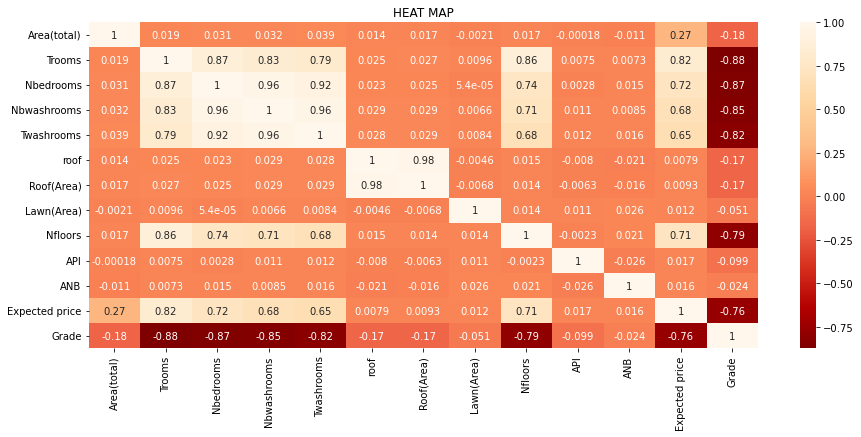

In [18]:
fig=plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='OrRd_r');
plt.title("HEAT MAP");

#### INTERPRETATION:ROOMS,BEDROOMS,WASHROOMS,PRICE & FLOORS ARE HIGHLY CORRELATED WITH TARGET COLUMN i.e., GRADE.

In [19]:
mm=MinMaxScaler()
df_scaled=pd.DataFrame(mm.fit_transform(df),columns=df.columns)
df_scaled

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.90,0.666667,0.833333,0.2,0.642330,0.25
2996,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,0.34,1.000000,0.950000,0.6,0.460546,0.00
2997,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.75
2998,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.25


In [20]:
y=df['Grade']
x=df_scaled
df_scaled.drop('Grade',axis=1,inplace=True)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2400, 12), (600, 12), (2400,), (600,))

In [22]:
df['Grade'].value_counts()

3    1270
2     716
1     539
0     399
4      76
Name: Grade, dtype: int64

### MODELS:

### == K NEIGHBORS CLASSIFIER:==

In [23]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
print("TRAINING PERFORMANCE  :",knc.score(x_train,y_train))
print("TRAINING PERFORMANCE  :",knc.score(x_test,y_test))

TRAINING PERFORMANCE  : 0.9208333333333333
TRAINING PERFORMANCE  : 0.88


In [25]:
y_pred=knc.predict(x_test)

In [26]:
modelp=r2_score(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)
pre=precision_score(y_pred,y_test,average='weighted')
rec=recall_score(y_pred,y_test,average='weighted')
f1=f1_score(y_pred,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelp)
print("ACCURACY SCORE  :",acc)
print("PRECISION SCORE  :",pre)
print("RECALL SCORE  :",rec)
print("F1 SCORE  :",f1)

MODEL PERFORMANCE  : 0.9060019495891937
ACCURACY SCORE  : 0.88
PRECISION SCORE  : 0.8820638158431884
RECALL SCORE  : 0.88
F1 SCORE  : 0.8804397953656484


In [27]:
print("CLASSIFICATION REPORT  :")
print(cr(y_pred,y_test))

CLASSIFICATION REPORT  :
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        90
           1       0.82      0.80      0.81       109
           2       0.81      0.83      0.82       122
           3       0.94      0.94      0.94       273
           4       0.60      1.00      0.75         6

    accuracy                           0.88       600
   macro avg       0.81      0.88      0.84       600
weighted avg       0.88      0.88      0.88       600



In [28]:
print("CONFUSION MATRIX  KNC:")
print(confusion_matrix(y_pred,y_test))

CONFUSION MATRIX  KNC:
[[ 77  13   0   0   0]
 [ 10  87  12   0   0]
 [  0   6 101  15   0]
 [  0   0  12 257   4]
 [  0   0   0   0   6]]


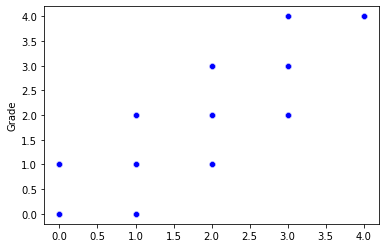

In [29]:
sns.scatterplot(y_pred,y_test,color='b');

### == SVC ==

In [30]:
from sklearn.svm import SVC

In [31]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [32]:
print("TRAINING PERFORMANCE  :",svc.score(x_train,y_train))
print("TRAINING PERFORMANCE  :",svc.score(x_test,y_test))

TRAINING PERFORMANCE  : 0.9658333333333333
TRAINING PERFORMANCE  : 0.9533333333333334


In [33]:
y_pred1=svc.predict(x_test)

In [34]:
modelp2=r2_score(y_pred1,y_test)
acc2=accuracy_score(y_pred1,y_test)
pre2=precision_score(y_pred1,y_test,average='weighted')
rec2=recall_score(y_pred1,y_test,average='weighted')
f12=f1_score(y_pred1,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelp2)
print("ACCURACY SCORE  :",acc)
print("PRECISION SCORE  :",pre)
print("RECALL SCORE  :",rec)
print("F1 SCORE  :",f1)

MODEL PERFORMANCE  : 0.9623601950100373
ACCURACY SCORE  : 0.88
PRECISION SCORE  : 0.8820638158431884
RECALL SCORE  : 0.88
F1 SCORE  : 0.8804397953656484


In [35]:
print("CLASSIFICATION REPORT  :")
print(cr(y_pred1,y_test))

CLASSIFICATION REPORT  :
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        83
           1       0.96      0.89      0.93       114
           2       0.92      0.96      0.94       120
           3       0.99      0.97      0.98       278
           4       0.50      1.00      0.67         5

    accuracy                           0.95       600
   macro avg       0.86      0.96      0.89       600
weighted avg       0.96      0.95      0.95       600



In [36]:
print("CONFUSION MATRIX SVC")
print(confusion_matrix(y_pred1,y_test))

CONFUSION MATRIX SVC
[[ 81   2   0   0   0]
 [  6 102   6   0   0]
 [  0   2 115   3   0]
 [  0   0   4 269   5]
 [  0   0   0   0   5]]


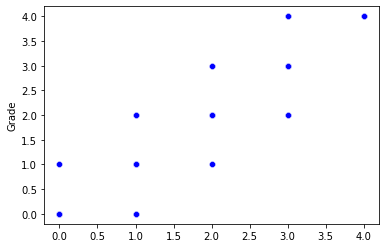

In [37]:
sns.scatterplot(y_pred1,y_test,color='b');

### == GAUSSIAN NAIVE BAYES ==

In [38]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [39]:
print("TRAINING PERFORMANCE  :",gb.score(x_train,y_train))
print("TEST PERFORMANCE  : ",gb.score(x_test,y_test))

TRAINING PERFORMANCE  : 0.80375
TEST PERFORMANCE  :  0.8133333333333334


In [40]:
y_pred2=gb.predict(x_test)

In [41]:
modelp3=r2_score(y_pred2,y_test)
accu=accuracy_score(y_pred2,y_test)
prec=precision_score(y_pred2,y_test,average='weighted')
reca=recall_score(y_pred2,y_test,average='weighted')
f1_s=f1_score(y_pred2,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelp3)
print("ACCURACY SCORE  :",accu)
print("PRECISION SCORE  :",prec)
print("RECALL SCORE  :",reca)
print("F1 SCORE  :",f1_s)

MODEL PERFORMANCE  : 0.8567665038238228
ACCURACY SCORE  : 0.8133333333333334
PRECISION SCORE  : 0.8120081824792377
RECALL SCORE  : 0.8133333333333334
F1 SCORE  : 0.8087586697755811


In [42]:
print("CLASSIFICATION REPORT  :")
print(cr(y_pred2,y_test))

CLASSIFICATION REPORT  :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        83
           1       0.83      0.70      0.76       126
           2       0.68      0.69      0.68       124
           3       0.85      0.94      0.89       248
           4       0.80      0.42      0.55        19

    accuracy                           0.81       600
   macro avg       0.81      0.73      0.75       600
weighted avg       0.81      0.81      0.81       600



In [43]:
print("CONFUSION MATRIX GAUSSIAN")
print(confusion_matrix(y_pred2,y_test))

CONFUSION MATRIX GAUSSIAN
[[ 75   8   0   0   0]
 [ 12  88  26   0   0]
 [  0  10  85  29   0]
 [  0   0  14 232   2]
 [  0   0   0  11   8]]


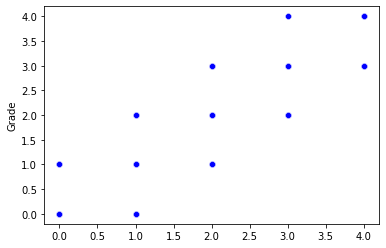

In [44]:
sns.scatterplot(y_pred2,y_test,color='b');

### ==== GRADIENT BOOSTING CLASSIFIER ======

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [47]:
print("TRAINING PERFORMANCE  :",gbc.score(x_train,y_train))
print("TEST PERFORMANCE  : ",gbc.score(x_test,y_test))

TRAINING PERFORMANCE  : 0.9895833333333334
TEST PERFORMANCE  :  0.9283333333333333


In [48]:
y_pred4=gbc.predict(x_test)

In [49]:
modelp4=r2_score(y_pred4,y_test)
accu4=accuracy_score(y_pred4,y_test)
prec4=precision_score(y_pred4,y_test,average='weighted')
reca4=recall_score(y_pred4,y_test,average='weighted')
f1_s4=f1_score(y_pred4,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelp4)
print("ACCURACY SCORE  :",accu4)
print("PRECISION SCORE  :",prec4)
print("RECALL SCORE  :",reca4)
print("F1 SCORE  :",f1_s4)

MODEL PERFORMANCE  : 0.9409663668459795
ACCURACY SCORE  : 0.9283333333333333
PRECISION SCORE  : 0.9334939461262709
RECALL SCORE  : 0.9283333333333333
F1 SCORE  : 0.9300074881910247


In [50]:
print("CLASSIFICATION REPORT  :")
print(cr(y_pred4,y_test))

CLASSIFICATION REPORT  :
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        80
           1       0.91      0.87      0.89       110
           2       0.90      0.90      0.90       126
           3       0.98      0.95      0.97       279
           4       0.40      0.80      0.53         5

    accuracy                           0.93       600
   macro avg       0.82      0.90      0.84       600
weighted avg       0.93      0.93      0.93       600



In [51]:
print("CONFUSION MATRIX GRADIENT ")
print(confusion_matrix(y_pred4,y_test))

CONFUSION MATRIX GRADIENT 
[[ 78   2   0   0   0]
 [  9  96   5   0   0]
 [  0   8 113   5   0]
 [  0   0   7 266   6]
 [  0   0   0   1   4]]


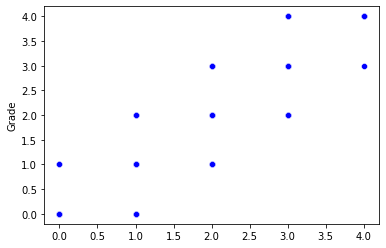

In [52]:
sns.scatterplot(y_pred4,y_test,color='b');

## ==== CROSS-VALIDATION ====

In [53]:
skf=StratifiedKFold()

In [54]:
cv1=cross_val_score(KNeighborsClassifier(),x,y,cv=skf,scoring='f1_weighted').mean()
print("CROSS-VAL SCORE FOR STRATIFIED IS ====> ",cv1)

CROSS-VAL SCORE FOR STRATIFIED IS ====>  0.8696346945609509


In [55]:
cv2=cross_val_score(SVC(),x,y,cv=skf,scoring='f1_weighted').mean()
print("CROSS-VAL SCORE FOR STRATIFIED IS ====> ",cv2)

CROSS-VAL SCORE FOR STRATIFIED IS ====>  0.9421265401832988


In [56]:
cv3=cross_val_score(GaussianNB(),x,y,cv=skf,scoring='f1_weighted').mean()
print("CROSS-VAL SCORE FOR STRATIFIED IS ====> ",cv3)

CROSS-VAL SCORE FOR STRATIFIED IS ====>  0.8036227461447238


In [57]:
cv4=cross_val_score(GradientBoostingClassifier(),x,y,cv=skf,scoring='f1_weighted').mean()
print("CROSS-VAL SCORE FOR STRATIFIED IS ====> ",cv4)

CROSS-VAL SCORE FOR STRATIFIED IS ====>  0.9113783374323713


## ==== HYPER PARAMETER TUNING =====

In [58]:
from sklearn.model_selection import GridSearchCV

### ~ KNC

In [59]:
parameter={'n_neighbors':[3,4,7,9,10],"weights":['uniform','distance']}
gsc=GridSearchCV(knc,cv=skf,param_grid=parameter)
gsc.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 7, 9, 10],
                         'weights': ['uniform', 'distance']})

In [60]:
gsc.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [61]:
knc1=KNeighborsClassifier(n_neighbors=10, weights= 'distance')
knc1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [62]:
y_pred_h=knc1.predict(x_test)

In [63]:
modelh=r2_score(y_pred_h,y_test)
acch=accuracy_score(y_pred_h,y_test)
preh=precision_score(y_pred_h,y_test,average='weighted')
rech=recall_score(y_pred_h,y_test,average='weighted')
f1h=f1_score(y_pred_h,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelh)
print("ACCURACY SCORE  :",acch)
print("PRECISION SCORE  :",preh)
print("RECALL SCORE  :",rech)
print("F1 SCORE  :",f1h)

MODEL PERFORMANCE  : 0.9236864360449938
ACCURACY SCORE  : 0.905
PRECISION SCORE  : 0.9107946862681312
RECALL SCORE  : 0.905
F1 SCORE  : 0.9069393485329099


## ~ SVC

In [64]:
param={'C':[1,2,3,4,5,6],'degree':[3,5,6,7,8]}

In [65]:
gsc2=GridSearchCV(svc,cv=skf,param_grid=param)
gsc2.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6], 'degree': [3, 5, 6, 7, 8]})

In [66]:
gsc2.best_params_

{'C': 5, 'degree': 3}

In [67]:
svc1=SVC(C=5,degree=3)
svc1.fit(x_train,y_train)

SVC(C=5)

In [68]:
y_pred_s=svc1.predict(x_test)

In [69]:
model_s=r2_score(y_pred_s,y_test)
accs=accuracy_score(y_pred_s,y_test)
pres=precision_score(y_pred_s,y_test,average='weighted')
recs=recall_score(y_pred_s,y_test,average='weighted')
f1s=f1_score(y_pred_s,y_test,average='weighted')
print("MODEL PERFORMANCE  :",model_s)
print("ACCURACY SCORE  :",accs)
print("PRECISION SCORE  :",pres)
print("RECALL SCORE  :",recs)
print("F1 SCORE  :",f1s)

MODEL PERFORMANCE  : 0.9702531189154107
ACCURACY SCORE  : 0.9633333333333334
PRECISION SCORE  : 0.9646922891550895
RECALL SCORE  : 0.9633333333333334
F1 SCORE  : 0.9636122839323491


### ~ GAUSSIAN NB

In [70]:
params={'var_smoothing':[1e-09,1e-010,1e-08]}   
gsc3=GridSearchCV(gb,cv=skf,param_grid=params)
gsc3.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-08]})

In [71]:
#(var smoothning)Portion of the largest variance of all features that is added to variances for calculation stability
gsc3.best_params_

{'var_smoothing': 1e-09}

In [72]:
gb1=GaussianNB()
gb1.fit(x_train,y_train)

GaussianNB()

In [73]:
y_pred_g=gb1.predict(x_test)

In [74]:
modelg=r2_score(y_pred_g,y_test)
accg=accuracy_score(y_pred_g,y_test)
preg=precision_score(y_pred_g,y_test,average='weighted')
recg=recall_score(y_pred_g,y_test,average='weighted')
f1g=f1_score(y_pred_g,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelg)
print("ACCURACY SCORE  :",accg)
print("PRECISION SCORE  :",preg)
print("RECALL SCORE  :",recg)
print("F1 SCORE  :",f1g)

MODEL PERFORMANCE  : 0.8567665038238228
ACCURACY SCORE  : 0.8133333333333334
PRECISION SCORE  : 0.8120081824792377
RECALL SCORE  : 0.8133333333333334
F1 SCORE  : 0.8087586697755811


### ~ GRADIENT BOOSTING

In [75]:
parameters={'learning_rate':[0.1,0.4,0.6], 'n_estimators':[100,80]}   
gsc4=GridSearchCV(gbc,cv=skf,param_grid=parameters)
gsc4.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.4, 0.6],
                         'n_estimators': [100, 80]})

In [76]:
gsc4.best_params_

{'learning_rate': 0.4, 'n_estimators': 80}

In [77]:
gbc1=GradientBoostingClassifier(learning_rate= 0.4, n_estimators= 80)
gbc1.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=80)

In [78]:
y_pred_gb=gbc1.predict(x_test)

In [79]:
modelgb=r2_score(y_pred_gb,y_test)
accgb=accuracy_score(y_pred_gb,y_test)
pregb=precision_score(y_pred_gb,y_test,average='weighted')
recgb=recall_score(y_pred_gb,y_test,average='weighted')
f1gb=f1_score(y_pred_gb,y_test,average='weighted')
print("MODEL PERFORMANCE  :",modelgb)
print("ACCURACY SCORE  :",accgb)
print("PRECISION SCORE  :",pregb)
print("RECALL SCORE  :",recgb)
print("F1 SCORE  :",f1gb)

MODEL PERFORMANCE  : 0.9533721898417985
ACCURACY SCORE  : 0.9416666666666667
PRECISION SCORE  : 0.9438334182964013
RECALL SCORE  : 0.9416666666666667
F1 SCORE  : 0.9423971493875641


#### DATAFRAME WITHOUT HYPERPARAMETER TUNING

In [80]:
r2=[modelp,modelp2,modelp3,modelp4]
f1_score=[f1,f12,f1_s,f1_s4]
models=['K-NEAREST CLASSIFIER ','SVC ','GAUSSIAN ','GRADIENT BOOSTING']
df1=pd.DataFrame({'Models':models,'Model Performance ':r2,"F1-Scores":f1_score})
df1

,Models,Model Performance,F1-Scores
0,K-NEAREST CLASSIFIER,0.906002,0.880440
1,SVC,0.962360,0.954540
2,GAUSSIAN,0.856767,0.808759
3,GRADIENT BOOSTING,0.940966,0.930007


#### DATAFRAME WITH CROSS-VALIDATION

In [81]:
f1_score=[cv1,cv2,cv3,cv4]
models=['K-NEAREST CLASSIFIER ','SVC ','GAUSSIAN ','GRADIENT BOOSTING']
df2=pd.DataFrame({'Models':models,"CV(F1-Scores)":f1_score})
df2

,Models,CV(F1-Scores)
0,K-NEAREST CLASSIFIER,0.869635
1,SVC,0.942127
2,GAUSSIAN,0.803623
3,GRADIENT BOOSTING,0.911378


#### DATAFRAME WITH HYPER-PARAMETER TUNING

In [82]:
r2=[modelh,model_s,modelg,modelgb]
f1_score=[f1h,f1s,f1g,f1gb]
models=['K-NEAREST CLASSIFIER ','SVC ','GAUSSIAN ','GRADIENT BOOSTING']
df1=pd.DataFrame({'Models':models,'Model Performance ':r2,"F1-Scores":f1_score})
df1

,Models,Model Performance,F1-Scores
0,K-NEAREST CLASSIFIER,0.923686,0.906939
1,SVC,0.970253,0.963612
2,GAUSSIAN,0.856767,0.808759
3,GRADIENT BOOSTING,0.953372,0.942397


#### FINAL DATAFRAME FOR BEST MODEL(SVC)

In [83]:
final_df=pd.DataFrame({"ACTUAL VALUE":y_test,"PREDICTED VALUE SVC(without ht)":y_pred1,"PREDICTED VALUE SVC(with ht)":y_pred_s})
final_df.head()

,ACTUAL VALUE,PREDICTED VALUE SVC(without ht),PREDICTED VALUE SVC(with ht)
1801,2,2,2
1190,2,2,2
1817,3,3,3
251,2,2,2
2505,0,0,0


In [84]:
final_df.to_csv("MINI_PROJECT3.csv ",index=False)

In [85]:
df.columns
df.head(2)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3


In [86]:
li=[]
col=['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms','roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 
       'Expected price', 'Grade']
for i in col:
    enter=input(f"PLEASE ENTER {i} ==> ")
    li.append(enter)
num=np.array([]).reshape(-1,1)
num1=np.append(li,num).reshape(1,-1)
svc1.predict(num1)

PLEASE ENTER Area(total) ==> 567
PLEASE ENTER Trooms ==> 7
PLEASE ENTER Nbedrooms ==> 5
PLEASE ENTER Nbwashrooms ==> 6
PLEASE ENTER Twashrooms ==> 5
PLEASE ENTER roof ==> 1
PLEASE ENTER Roof(Area) ==> 66
PLEASE ENTER Lawn(Area) ==> 657
PLEASE ENTER Nfloors ==> 6
PLEASE ENTER API ==> 56
PLEASE ENTER Expected price ==> 5677
PLEASE ENTER Grade ==> 2


array([1])

## INTERPRETATION:
- SUPPORT VECTOR CLASSIFIER IS THE ALGORITHM WHICH IS SHOWING BEST RESULT IN TERMS OF MODEL PERFORMANCE AND F1-SCORE.
- HERE WE ARE PRIORITISING F1-SCORE BECAUSE DATA IS BIASED.
- FOR CROSS VALSCORE ,BEFORE HYPERPARAMETER TUNING AND AFTER PARAMETER TUNING WE ARE GETTING SVC AS THE BEST MODEL FOR THIS DATA.